<a href="https://colab.research.google.com/github/GarlandZhang/hairy_gan/blob/master/fast_style_transfer_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import functools
import os

import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import cv2

In [13]:
def load_image(path, img_size):
  img = plt.imread(path)
  if img.shape[-1] > 3:
    img = img[:, :, :3]

  img = img / 255.
  img = np.expand_dims(img, axis=0)
  img = tf.image.resize(img, img_size, preserve_aspect_ratio=True)
  return img

In [3]:
def display(images):
  rows, cols = len(images[0]), len(images)
  fig, axes = plt.subplots(rows, cols)

  count = 0

  if rows == 1:
    for col in range(cols):
      axes[col].imshow(images[count][0])
      axes[col].axis('off')
      count += 1
  else:
    for row in range(rows):
      for col in range(cols):
        axes[row, col].imshow(images[row][count])
        axes[row, col].axis('off')
        count += 1

  plt.show()

In [5]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [14]:
project_path = '/content/drive/My Drive/hairy_gan'
content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.png' # @param {type:"string"}
content_image_url = os.path.join(project_path, 'content.jpg')
style_image_url = 'https://www.pngkey.com/png/full/955-9559487_672-x-527-11-great-wave-off-kanagawa.png' # @param {type:"string"}
style_image_url = os.path.join(project_path, 'style.jpg')
output_image_size = 384  # @param {type:"integer"}
content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)
content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_tensor = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')

In [15]:
outputs = hub_module(content_image, style_tensor)
stylized_image = outputs[0]

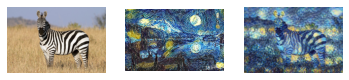

In [24]:
display([content_image, style_image, stylized_image])